## K平均法を用いたクラスタリング

教師なし学習と言えばK平均法。入力されたデータからクラスタリングを作成する。

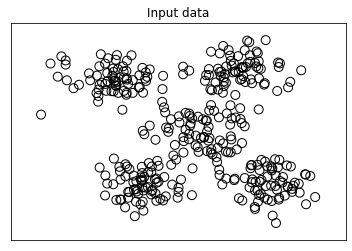

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans

# ファイルを読み込む
input_file = './data/data_clustering.txt'
X = np.loadtxt(input_file, delimiter=',')

# グラフを作成する
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', edgecolors='black', s=80)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.title('Input data') 
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

グループが見た目5つに別れてるっぽいので、クラスタ数を5として計算してみる

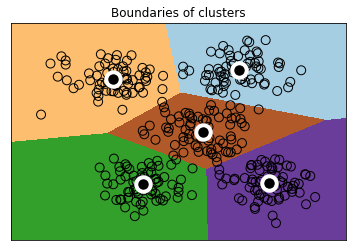

In [15]:
# クラスタ数を5とする
num_clusters = 5

# init: クラスタの中心点の初期位置を設定する方法（k-means++)
# n_clusters: クラスタ数
# n_init: 結果判定までに何回計算をするか
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Xで訓練する
kmeans.fit(X)

# グリッドサイズを設定する
step_size = 0.01

x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# 全ての点に対して訓練したkmeansモデルにかけて出力を推定する
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
output = output.reshape(x_vals.shape)

# グラフに領域を色分けして表示する
plt.figure() 
plt.clf() 
plt.imshow(output, interpolation='nearest', 
           extent=(x_vals.min(), x_vals.max(), 
                   y_vals.min(), y_vals.max()), 
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')

# 入力点をプロットする
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', 
            edgecolors='black', s=80)

# クラスタの中心点を取得する
cluster_centers = kmeans.cluster_centers_

# クラスタの中心点をプロットする
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='o', s=210, linewidths=4, color='white',
            zorder=12, facecolor='black')

# グラフを仕上げる
plt.title('Boundaries of clusters') 
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show() 